## LogisticRegression
---
- 인공신경망의 기본 개념와 동일  

- Regression이지만 이진분류(Binary Classification)으로 사용  

- 선형모델 기반으로 y=wx+b 그래도 사용

- y=wx+b의 결과=> 분류 변환 함수 => scipy.sepcial.expit()

### 성적 - 합격/불합격 분류  실습

In [1]:
# 사용 모듈 로딩 ------------------------------------------
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

#### (1) 데이터 준비

In [2]:
X=[82,85, 87, 92, 94, 97]    # 점수
y=['B','B','B','A','A','A'] # 학점

In [3]:
# 학습에 사용할 수 있도록 형변환 
arrX = np.array(X).reshape(-1,1)
arrY = np.array(y)

In [4]:
# 데이터 체크
print('arrX : ', arrX.shape, 'arrY : ', arrY.shape)

arrX :  (6, 1) arrY :  (6,)


#### (2)  데이터 확인 => 시각화

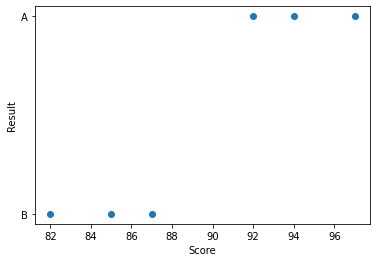

In [5]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### [3] 모델 생성 & 학습

In [6]:
model=LogisticRegression()

In [7]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [8]:
# 학습 후 설정된 속성
print( "분류 종류 : ", model.classes_)
print( "가중치 값 : ", model.coef_)
print( "절편   값 : ", model.intercept_)
print( "특성 갯수 : ", model.n_features_in_)

분류 종류 :  ['A' 'B']
가중치 값 :  [[-0.8204321]]
절편   값 :  [73.42867468]
특성 갯수 :  1


### [4] 평가  => score()  학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [9]:
model.score(arrX, arrY)

1.0

### [5] 테스트  => predict() : 새로운 데이터로 진행

In [10]:
preY=model.predict(arrX)

preY

array(['B', 'B', 'B', 'A', 'A', 'A'], dtype='<U1')

In [11]:
# 1개 데이터
preY=model.predict( [[87]])

print('예측결과 : ', preY)

예측결과 :  ['B']


In [12]:
probaY=model.predict_proba([[87]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  ['A' 'B']
예측확률 :  [[0.11394314 0.88605686]]


In [13]:
# 결정함수 y=wx+b
ret=model.decision_function([[87]])
print(np.round(ret, 3))

[2.051]


In [14]:
# y=Wx+b : 모델 파라미터
result=(model.coef_*87)+model.intercept_
print('result : ', np.round(result, 3))

result :  [[2.051]]


In [15]:
# 시그모이드 함수 expit(ax+b) 후 결과 확인
# predict_proba()함수의 양성에 대한 결과와 동일
from scipy.special import expit
sigValue2=expit(ret)
print('예측확률 : ', np.round(sigValue2, 5))
print('예측확률 : ', np.round(probaY,5))

예측확률 :  [0.88606]
예측확률 :  [[0.11394 0.88606]]
